Global Mobile Money Analysis

Loading and preparing datasets...
Sent Money Dataset: (515, 37)
Withdrew Money Dataset: (515, 37)
Clean Sent Money Records: 333
Clean Withdrew Money Records: 320

Cleaned and Merged Data Shape: (3006, 9)
Countries with complete data: 37

NUMERICAL ANALYSIS
Global Average - Sent Money: 17.05%
Global Average - Withdrew Money: 16.82%
Correlation between Sending and Withdrawing: 0.33

Descriptive Statistics for Key Metrics:
       send_percent  withdraw_percent  Adoption_Gap
count       3006.00           3006.00       3006.00
mean          17.05             16.82          0.23
std            7.21              6.52          7.97
min            1.13              1.04        -29.50
25%           11.53             12.13         -4.18
50%           16.69             16.33          0.23
75%           21.75             20.62          4.85
max           44.63             46.41         30.04

Top 10 Countries by Total Mobile Money Adoption:
     Country_Name  Total_Ado

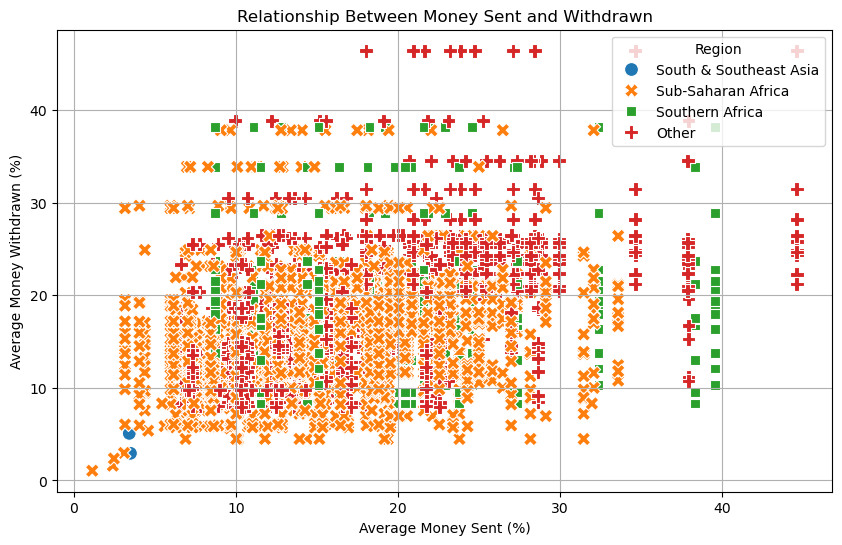

C:\Users\202204383\AppData\Local\Temp\ipykernel_20108\2733119912.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Total_Adoption', data=country_df, palette='Set3')


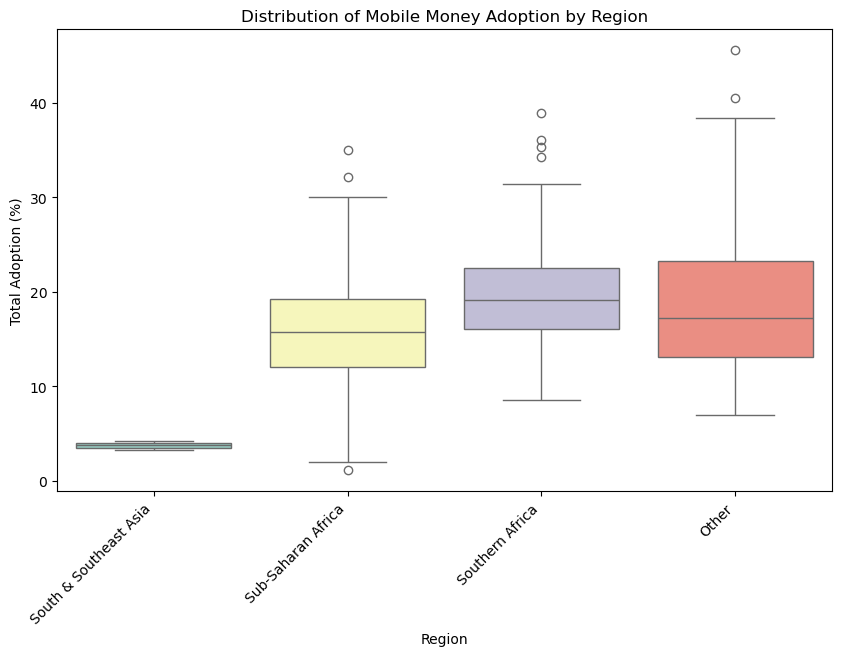

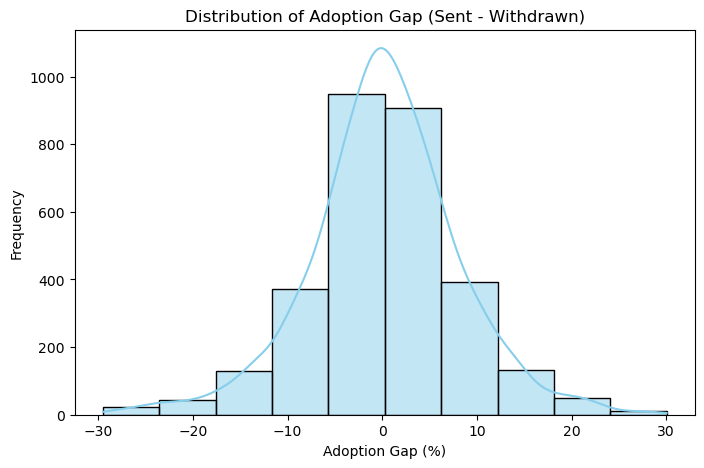

C:\Users\202204383\AppData\Local\Temp\ipykernel_20108\2733119912.py:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


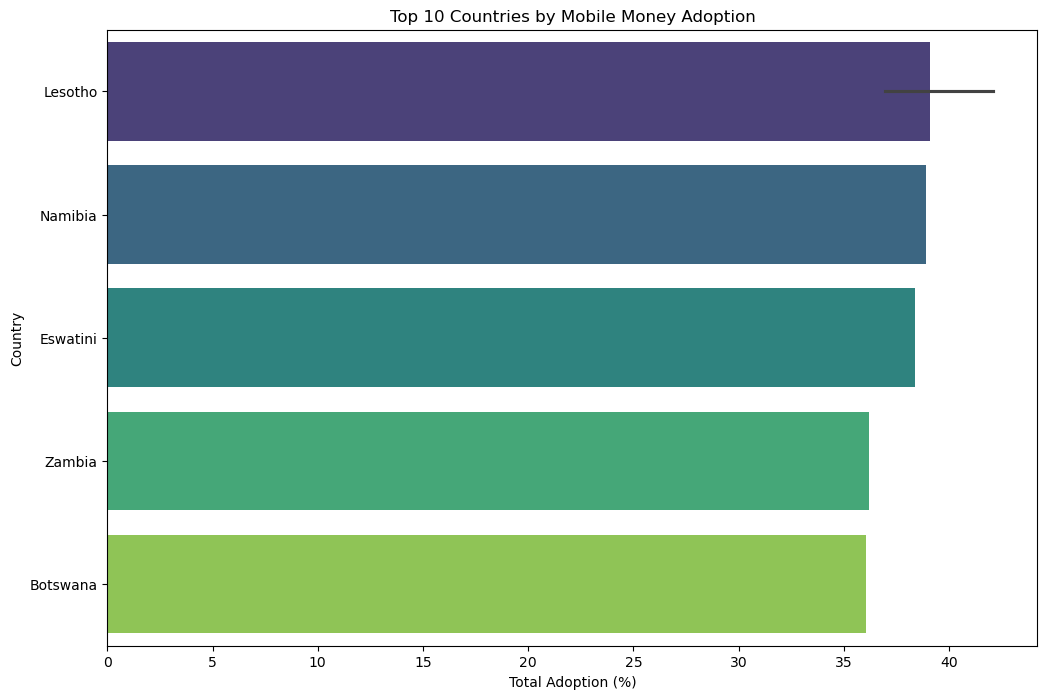

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print('Global Mobile Money Analysis')
print('=' * 50)

# Where we prepare and load the data
print('\nLoading and preparing datasets...')
# Here we load the datasets
sent_df = pd.read_csv(r"C:\Users\202204383\Desktop\WB_FINDEX_FIN13BM.csv")
withdrew_df = pd.read_csv(r"C:\Users\202204383\Desktop\WB_FINDEX_FIN13CM.csv")

# We print the shapes of the loaded dataframes
print(f'Sent Money Dataset: {sent_df.shape}')
print(f'Withdrew Money Dataset: {withdrew_df.shape}')

# Cleaning the data 
sent_df_clean = sent_df.dropna(subset=['OBS_VALUE']).copy()
withdrew_df_clean = withdrew_df.dropna(subset=['OBS_VALUE']).copy()

print(f'Clean Sent Money Records: {len(sent_df_clean)}')
print(f'Clean Withdrew Money Records: {len(withdrew_df_clean)}')

# Columns are renamed correctly
sent_df_clean.rename(columns={"OBS_VALUE": "send_percent"}, inplace=True)
withdrew_df_clean.rename(columns={"OBS_VALUE": "withdraw_percent"}, inplace=True)

# Here we merged the datasets (on shared keys: Country, Sex, and Year)
merged_df = pd.merge(
    sent_df_clean[['REF_AREA', 'REF_AREA_LABEL', 'SEX', 'send_percent', 'TIME_PERIOD']],
    withdrew_df_clean[['REF_AREA', 'SEX', 'withdraw_percent', 'TIME_PERIOD']],
    on=['REF_AREA', 'SEX', 'TIME_PERIOD'],
    how='inner'
)

# The Country-level analysis dataframe is simplified.
country_df = merged_df[merged_df['SEX'] == '_T'].copy()
# We rename the column for easy access.
country_df.rename(columns={'REF_AREA_LABEL': 'Country_Name'}, inplace=True)

# We Create columns for analysis.
country_df['Total_Adoption'] = (country_df['send_percent'] + country_df['withdraw_percent']) / 2
country_df['Adoption_Gap'] = country_df['send_percent'] - country_df['withdraw_percent']

# The'Region' column is added for regional analysis.
def get_region(country_code):
    if country_code in ['BEN', 'BFA', 'CIV', 'CMR', 'TCD', 'COD', 'COG', 'COM', 'ETH', 'GHA', 'GIN', 'KEN', 'MDG', 'MLI', 'MOZ', 'NER', 'NGA', 'RWA', 'SEN', 'SLE', 'TGO', 'UGA', 'ZAF', 'ZWE']:
        return 'Sub-Saharan Africa'
    elif country_code in ['BGD', 'KHM', 'IDN', 'LAO', 'MMR', 'PHL', 'THA', 'VNM']:
        return 'South & Southeast Asia'
    elif country_code in ['BWA', 'NAM']:
        return 'Southern Africa'
    else:
        return 'Other'
country_df['Region'] = country_df['REF_AREA'].apply(get_region)

print(f'\nCleaned and Merged Data Shape: {country_df.shape}')
print(f'Countries with complete data: {len(country_df["REF_AREA"].unique())}')

# The numerical analysis
print('\nNUMERICAL ANALYSIS')
print('=' * 30)

# We Calculate global averages from the cleaned data.
global_sent_avg = country_df['send_percent'].mean()
global_withdrew_avg = country_df['withdraw_percent'].mean()
correlation = country_df['send_percent'].corr(country_df['withdraw_percent'])

print(f"Global Average - Sent Money: {global_sent_avg:.2f}%")
print(f"Global Average - Withdrew Money: {global_withdrew_avg:.2f}%")
print(f"Correlation between Sending and Withdrawing: {correlation:.2f}")

# Descriptive statistics.
print("\nDescriptive Statistics for Key Metrics:")
print(country_df[['send_percent', 'withdraw_percent', 'Adoption_Gap']].describe().round(2))

# print the top 10 Countries by Total Adoption.
top_10_countries = country_df.sort_values('Total_Adoption', ascending=False).head(10)
print('\nTop 10 Countries by Total Mobile Money Adoption:')
print(top_10_countries[['Country_Name', 'Total_Adoption', 'Adoption_Gap']])

# conditional formatting
print('\nCONDITIONAL FINDINGS')
print('=' * 30)

# Here we Highlight the countries with a large Adoption Gap (> 5%).
country_df['High_Adoption_Gap'] = country_df['Adoption_Gap'].apply(lambda x: 'Yes' if abs(x) > 5 else 'No')
high_gap_countries = country_df[country_df['High_Adoption_Gap'] == 'Yes'][['Country_Name', 'Adoption_Gap']]

print("Countries with an Adoption Gap greater than 5%:")
print(high_gap_countries)

# -The Visualizations: 
print('\nVISUALIZATIONS')
print('=' * 30)

# Plot 1:Sent vs. Withdrawn Money. [Scatter Plot]
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='send_percent',
    y='withdraw_percent',
    data=country_df,
    hue='Region',
    s=100,
    style='Region'
)
plt.title('Relationship Between Money Sent and Withdrawn')
plt.xlabel('Average Money Sent (%)')
plt.ylabel('Average Money Withdrawn (%)')
plt.grid(True)
plt.show()

# Plot 2:Distribution of Mobile Money Adoption by Region.[Box Plot]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Total_Adoption', data=country_df, palette='Set3')
plt.title('Distribution of Mobile Money Adoption by Region')
plt.xlabel('Region')
plt.ylabel('Total Adoption (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot 3:Distribution of Adoption Gap.[Histogram]
plt.figure(figsize=(8, 5))
sns.histplot(country_df['Adoption_Gap'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Adoption Gap (Sent - Withdrawn)')
plt.xlabel('Adoption Gap (%)')
plt.ylabel('Frequency')
plt.show()

# Plot 4:Top 10 Countries by Mobile Money Adoption.[Bar Plot]
top_10_countries = country_df.sort_values('Total_Adoption', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Total_Adoption',
    y='Country_Name',
    data=top_10_countries,
    palette='viridis'
)
plt.title('Top 10 Countries by Mobile Money Adoption')
plt.xlabel('Total Adoption (%)')
plt.ylabel('Country')
plt.show()

